In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
%cd /content/drive/MyDrive/Final_Assesment
!ls


/content/drive/MyDrive/Final_Assesment
 ClassificationTask.ipynb  'Mobile Price Prediction Datatset.csv'   RegressionTask.ipynb
 heart.csv		    RegressionTask1.ipynb


In [74]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format


In [75]:
#dataset approval and loading
df=pd.read_csv("heart.csv")
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160

In [76]:
#Exploratory data analysis(EDA)


#summary statistics
print(df.describe())
#check for missing values
print(df.isnull().sum())




         Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease
count 918.00     918.00       918.00     918.00 918.00   918.00        918.00
mean   53.51     132.40       198.80       0.23 136.81     0.89          0.55
std     9.43      18.51       109.38       0.42  25.46     1.07          0.50
min    28.00       0.00         0.00       0.00  60.00    -2.60          0.00
25%    47.00     120.00       173.25       0.00 120.00     0.00          0.00
50%    54.00     130.00       223.00       0.00 138.00     0.60          1.00
75%    60.00     140.00       267.00       0.00 156.00     1.50          1.00
max    77.00     200.00       603.00       1.00 202.00     6.20          1.00
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [77]:
#columns with unique values
object_columns = df.select_dtypes(include=['object']).columns
for column in object_columns:
    print(f"Unique values in '{column}':")
    print(df[column].unique())
    print('\n')


Unique values in 'Sex':
['M' 'F']


Unique values in 'ChestPainType':
['ATA' 'NAP' 'ASY' 'TA']


Unique values in 'RestingECG':
['Normal' 'ST' 'LVH']


Unique values in 'ExerciseAngina':
['N' 'Y']


Unique values in 'ST_Slope':
['Up' 'Flat' 'Down']




Data Visualization

In [78]:
#transform all data into numerical data
df_dummies=pd.get_dummies(df)
print(df_dummies.head())



   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172     0.00             0   
1   49        160          180          0    156     1.00             1   
2   37        130          283          0     98     0.00             0   
3   48        138          214          0    108     1.50             1   
4   54        150          195          0    122     0.00             0   

   Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainType_NAP  ChestPainType_TA  \
0  False   True              False  ...              False             False   
1   True  False              False  ...               True             False   
2  False   True              False  ...              False             False   
3   True  False               True  ...              False             False   
4  False   True              False  ...               True             False   

   RestingECG_LVH  RestingECG_Normal  RestingECG_ST  ExerciseAngina_

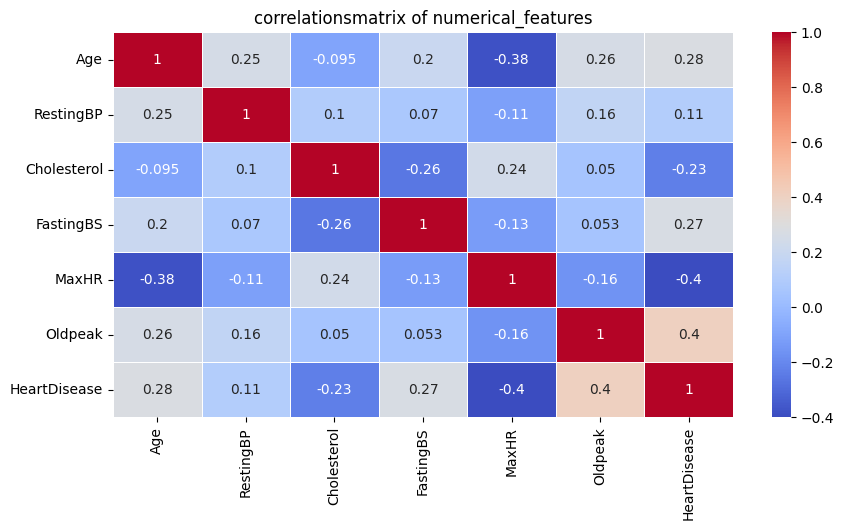

In [79]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5).figure.set_size_inches(10,5)
plt.title("correlationsmatrix of numerical_features")
plt.show()


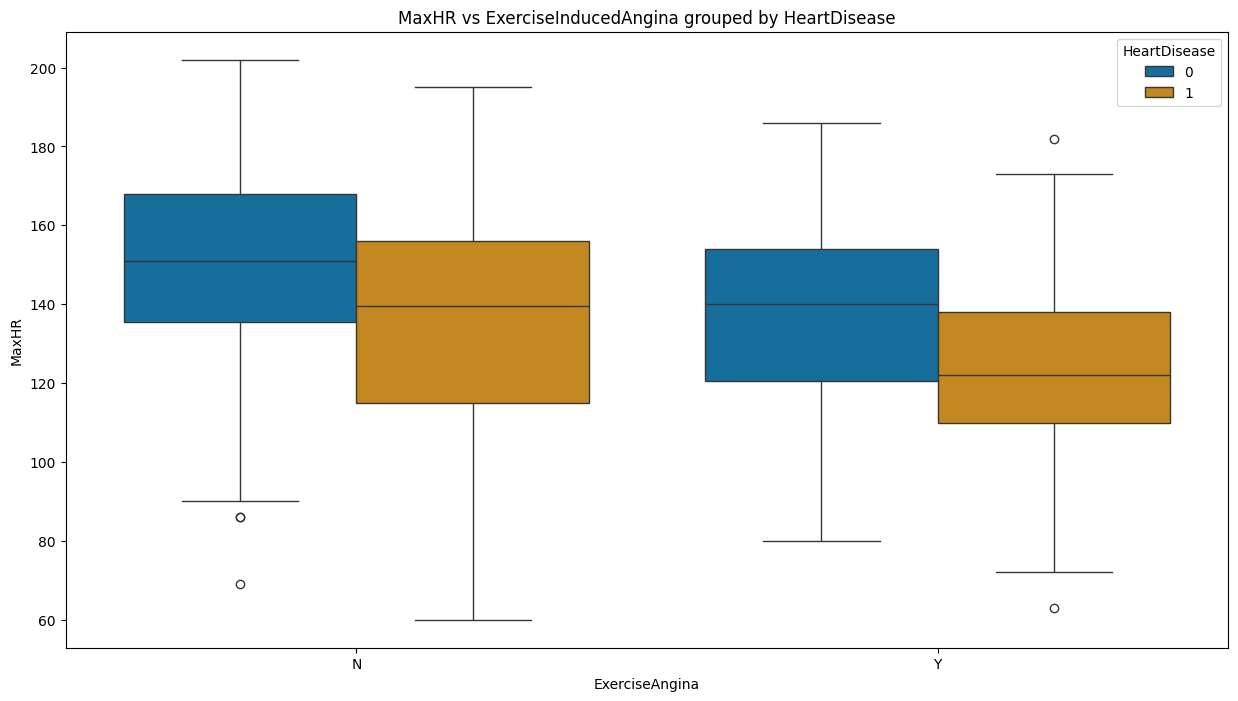

In [80]:
plt.figure(figsize=(15,8))
sns.boxplot(x='ExerciseAngina', y='MaxHR', hue='HeartDisease', data=df, palette='colorblind')
plt.title('MaxHR vs ExerciseInducedAngina grouped by HeartDisease')
plt.show()

<Figure size 1000x500 with 0 Axes>

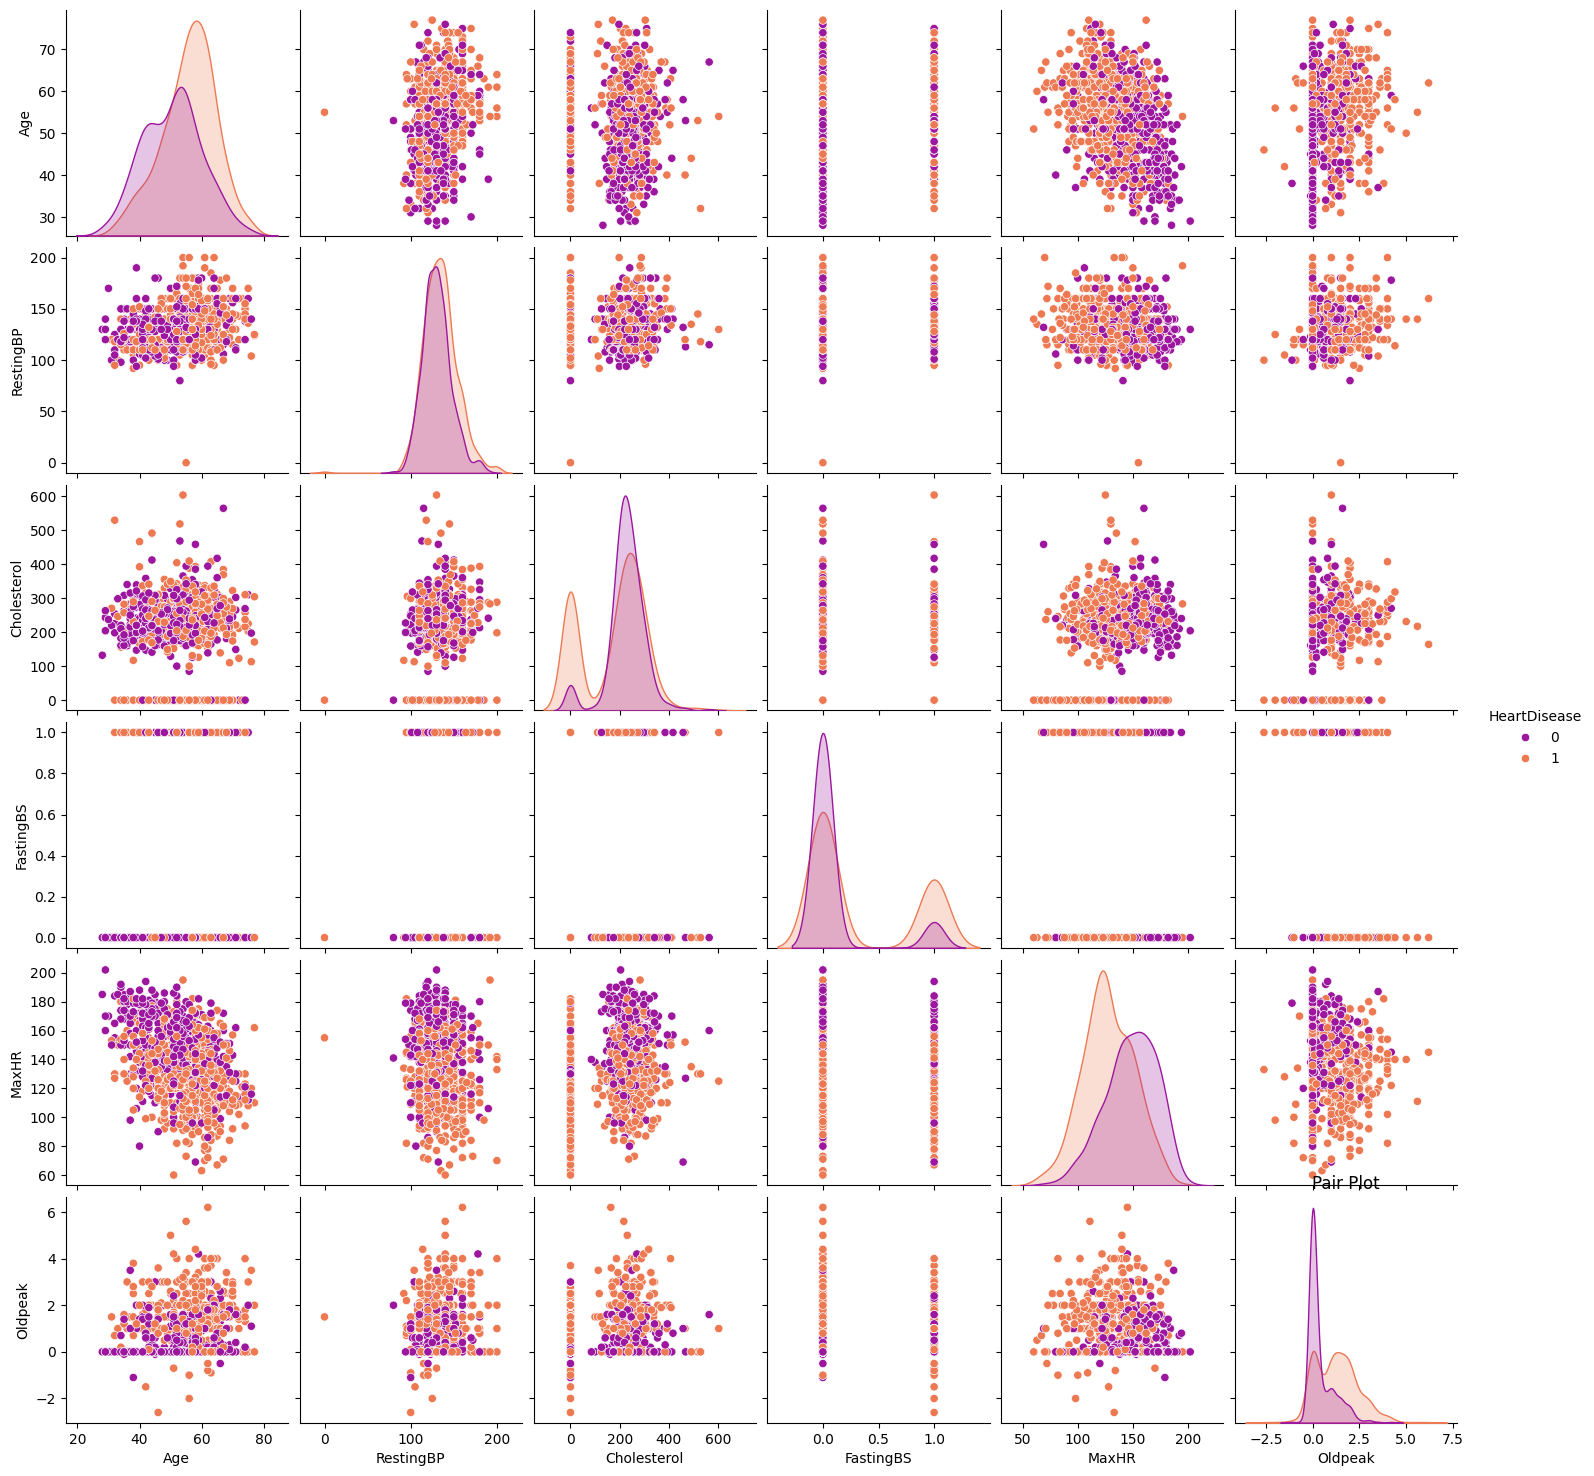

In [81]:
# Pairplot to visualize relationships
plt.figure(figsize=(10,5))
sns.pairplot(df, hue='HeartDisease', palette='plasma')
plt.title('Pair Plot')
plt.show()

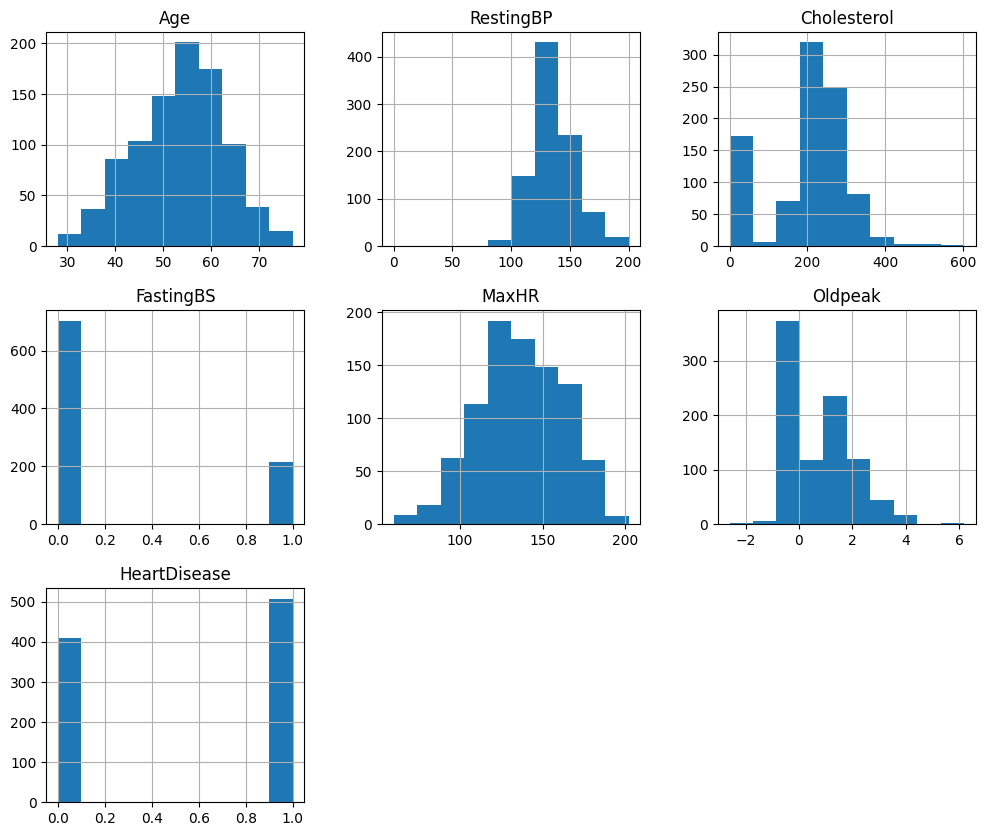

In [82]:
#Histograms for all features
df.hist(figsize=(12, 10))
plt.show()

Text(0.5, 1.0, 'Distribution of Heart Disease with ST_Slope ')

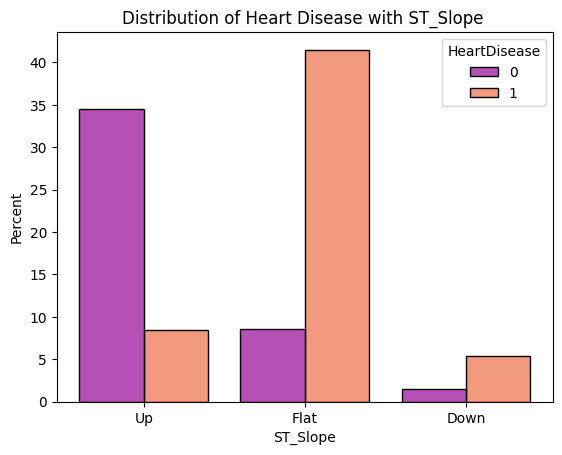

In [83]:
sns.histplot(data=df, x='ST_Slope', hue='HeartDisease', palette='plasma', stat='percent', multiple="dodge", shrink=0.8 )
plt.title('Distribution of Heart Disease with ST_Slope ')

Text(0.5, 1.0, 'Exercise Angina vs. Heart Disease')

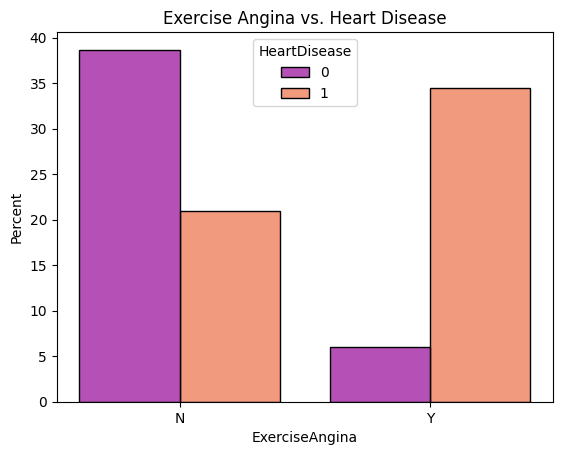

In [84]:
sns.histplot(data=df, x='ExerciseAngina', hue='HeartDisease', stat='percent', palette='plasma',multiple="dodge", shrink=0.8)
plt.title('Exercise Angina vs. Heart Disease')

Text(0.5, 1.0, 'Chest Pain Type vs. Heart Disease')

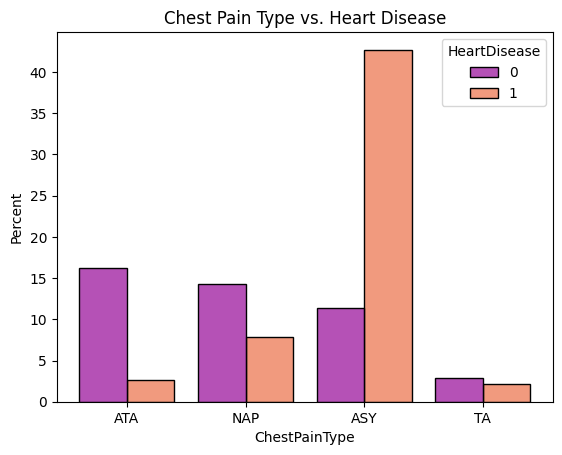

In [85]:
sns.histplot(data=df, x='ChestPainType', hue='HeartDisease', stat='percent', multiple="dodge", palette='plasma', shrink=0.8)
plt.title('Chest Pain Type vs. Heart Disease')

In [86]:
categorical_features = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]

numerical_features = ["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"]

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Ensure target column is numeric
df_encoded['HeartDisease'] = df_encoded['HeartDisease'].astype(int)

<!-- Build logistic regression From Scratch and Accuracy calculation -->

In [87]:
# from scipy.special import expit #sigmoid function

# X=df_encoded.drop(columns=['HeartDisease']).values
# y=df_encoded['HeartDisease'].values

# # Convert to float
# X = X.astype(float)

# # Add bias term
# X=np.c_[np.ones(X.shape[0]), X]

# #initialize parameters
# theta=np.zeros(X.shape[1])
# alpha=0.01 #learning rate
# iterations=1000

# #Gradient Descent
# for _ in range(iterations):
#   predictions=expit(X.dot(theta)) #sigmoid function
#   errors= predictions-y
#   theta -= (alpha / len(y)) * X.T.dot(errors)

# print("Trained Parameters:",theta)

# #  What This Does:

# # Uses gradient descent to minimize the cost function.
# # Uses the sigmoid function to compute probabilities.
# # Updates weights (theta) iteratively.

Build logistic regression From Scratch and Accuracy **calculation** ****

In [88]:
# Split dataset into features and target
X=df_encoded.drop(columns=['HeartDisease']).values
y=df_encoded['HeartDisease'].values

# Convert to float
X = X.astype(float)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def compute_cost(X, y, weights):
    m = len(y)
    predictions = sigmoid(np.dot(X, weights))
    cost = (-1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

# Gradient descent
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        predictions = sigmoid(np.dot(X, weights))
        errors = predictions - y
        gradient = (1 / m) * np.dot(X.T, errors)
        weights -= learning_rate * gradient
        cost_history.append(compute_cost(X, y, weights))

    return weights, cost_history

# Initialize weights
weights = np.zeros(X_train.shape[1])
learning_rate = 0.01
iterations = 1000

# Train model
weights, cost_history = gradient_descent(X_train, y_train, weights, learning_rate, iterations)

# Predictions
def predict(X, weights):
    return [1 if i >= 0.5 else 0 for i in sigmoid(np.dot(X, weights))]

# Evaluate model
y_pred = predict(X_test, weights)

#calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(f"Accuracy of Logistic Regression from Scratch: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")



Accuracy of Logistic Regression from Scratch: 0.8261
Precision: 0.9032
Recall: 0.7850
F1 Score: 0.8400


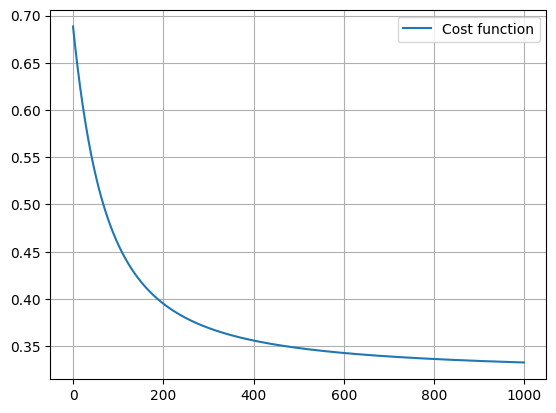

In [89]:
plt.plot(range(iterations),cost_history,label='Cost function')
plt.legend(loc ='upper right')
plt.grid()
plt.show()

#the graph shows how well the model is learning properly as the cost decereases over iterations and help assess learning progress and convergence.

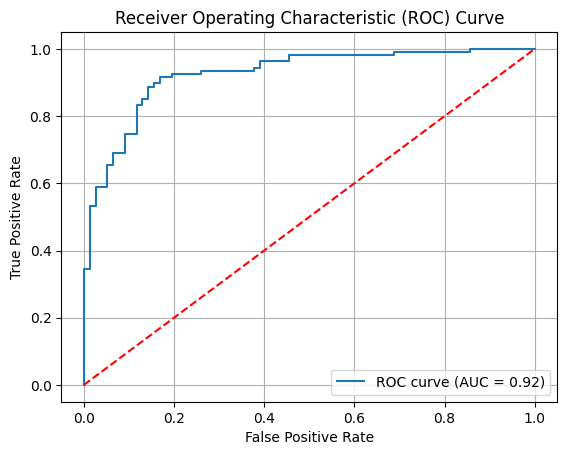

In [90]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for ROC curve
y_prob_test = sigmoid(np.dot(X_test, weights))  # Get predicted probabilities

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob_test)  # False Positive Rate and True Positive Rate
roc_auc = auc(fpr, tpr)  # Area Under the Curve

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



The ROC curve shows the tradeoff between TPR and FPR at different thresholds. The AUC(Area Under Curve) indicates overall performance showing how well a model performs with value closer to 1 as excellent performance and 0.5 means random guessing.

## **Build two Classification models(Use models)**

In [91]:
# Split dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for models like Logistic Regression)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Model 1: Logistic Regression (Scikit-Learn)
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

# Model 2: Random Forest Classifier
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

# Compare Performance
acc1 = accuracy_score(y_test, y_pred1)
acc2 = accuracy_score(y_test, y_pred2)

print(f"Model 1 (Logistic Regression) Accuracy: {acc1:.4f}")
print(f"Model 2 (Random Forest) Accuracy: {acc2:.4f}")

# Detailed Classification Reports
print("\nLogistic Regression Report:")
print(classification_report(y_test, y_pred1))

print("\nRandom Forest Report:")
print(classification_report(y_test, y_pred2))

Model 1 (Logistic Regression) Accuracy: 0.8533
Model 2 (Random Forest) Accuracy: 0.8750

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184


Random Forest Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



In [92]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']
}

# Perform Grid Search with Cross Validation
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)

# Best Parameters
print("Best Parameters for Logistic Regression:", grid_lr.best_params_)

# Best Model
best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)

# Accuracy
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"Optimized Logistic Regression Accuracy: {acc_lr:.4f}")


Best Parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Optimized Logistic Regression Accuracy: 0.8533


In [93]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20],     # Maximum depth of trees
    'min_samples_split': [2, 5, 10]  # Minimum samples required to split a node
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

# Best Parameters
print("Best Parameters for Random Forest:", grid_rf.best_params_)

# Best Model
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Optimized Random Forest Accuracy: {acc_rf:.4f}")


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Optimized Random Forest Accuracy: 0.8696


In [94]:
from sklearn.feature_selection import RFE #RFE=Recursive Feature Elimination

# RFE for Logistic Regression
selector_lr = RFE(best_lr, n_features_to_select=5)
selector_lr.fit(X_train, y_train)

# Selected Features
selected_features_lr = [feature for feature, selected in zip(df_encoded.columns[:-1], selector_lr.support_) if selected]
print("Selected Features for Logistic Regression:", selected_features_lr)


Selected Features for Logistic Regression: ['Cholesterol', 'Sex_M', 'ChestPainType_ATA', 'RestingECG_ST', 'ST_Slope_Flat']


In [95]:
selector_rf = RFE(best_rf, n_features_to_select=5)
selector_rf.fit(X_train, y_train)

selected_features_rf = [feature for feature, selected in zip(df_encoded.columns[:-1], selector_rf.support_) if selected]
print("Selected Features for Random Forest:", selected_features_rf)


Selected Features for Random Forest: ['Cholesterol', 'MaxHR', 'Oldpeak', 'ExerciseAngina_Y', 'ST_Slope_Flat']


Final Model Accuracy: 0.8043

Final Model Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.84      0.78        77
           1       0.87      0.78      0.82       107

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.81      0.80      0.81       184



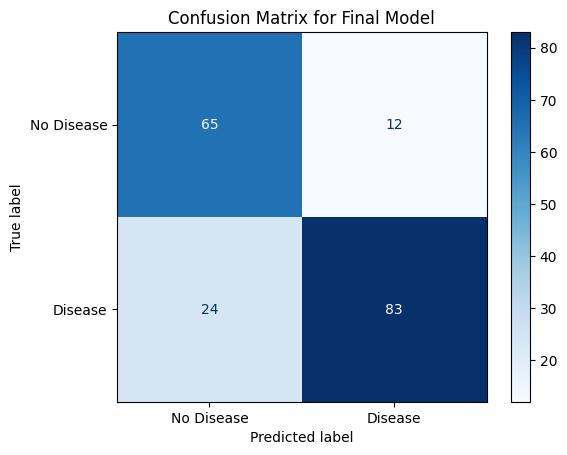

In [96]:
# Filter dataset with selected features
X_train_final = X_train[:, selector_rf.support_]
X_test_final = X_test[:, selector_rf.support_]

# Retrain with best model (Example: Random Forest)
final_model = best_rf.fit(X_train_final, y_train)
y_pred_final = final_model.predict(X_test_final)


# Evaluate Final Model
acc_final = accuracy_score(y_test, y_pred_final)
print(f"Final Model Accuracy: {acc_final:.4f}")

print("\nFinal Model Classification Report:")
print(classification_report(y_test, y_pred_final))

#compute confusion matrix
cm = confusion_matrix(y_test, y_pred_final)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Disease', 'Disease'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Final Model')
plt.show()
